# **Project Name**    - **TWITTER SENTIMENT ANALYSIS**


##### **Project Type**    - **Sentiment Analysis**
##### **Name - SHEIKH MOSTAQUL ARIF**      

# **Project Summary -**

The project involved conducting sentiment analysis on a Twitter dataset containing airline-related tweets. The dataset was preprocessed, and various machine learning models were trained and evaluated to classify tweets into sentiment categories (positive, negative, neutral). Key models included Logistic Regression, XGBoost, and Naive Bayes, each offering a different balance between accuracy and recall. The XGBoost Classification model emerged as the top performer with a strong accuracy score. The choice of the final model depends on specific priorities, with the XGBoost model providing a well-rounded solution for sentiment classification.

# **GitHub Link -**

https://github.com/Mostaqul143

# **Problem Statement**


Given tweets about six US airlines, the task is to predict whether a tweet contains positive, negative, or neutral sentiment about the airline. This is a typical supervised learning task where given a text string, we have to categorize the text string into predefined categories.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [136]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
string.punctuation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix


[nltk_data] Downloading package punkt to C:\Users\MOSTAQUL
[nltk_data]     ARIF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\MOSTAQUL
[nltk_data]     ARIF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\MOSTAQUL
[nltk_data]     ARIF\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Dataset Loading

In [68]:
# Load Dataset

df=pd.read_csv('Tweets.csv')

### Dataset First View

In [69]:
# Dataset First Look

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Dataset Rows & Columns count

In [70]:
# Dataset Rows & Columns count

print(f"Number Of Rows {df.shape[0]}")
print(f"Number Of Columns {df.shape[1]}")

Number Of Rows 14640
Number Of Columns 15


### Dataset Information

In [71]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

#### Duplicate Values

In [72]:
# Dataset Duplicate Value Count

num_duplicates = df.duplicated().sum()
print(f"Number of Duplicate Values: {num_duplicates}")

Number of Duplicate Values: 36


#### Missing Values/Null Values

In [73]:
# Missing Values/Null Values Count

num_missing = df.isnull().sum()
print("Number of Missing Values:\n", num_missing)

Number of Missing Values:
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [74]:
df.shape

(14640, 15)

In [75]:
#total null values
df.isnull().sum().sum()

61962

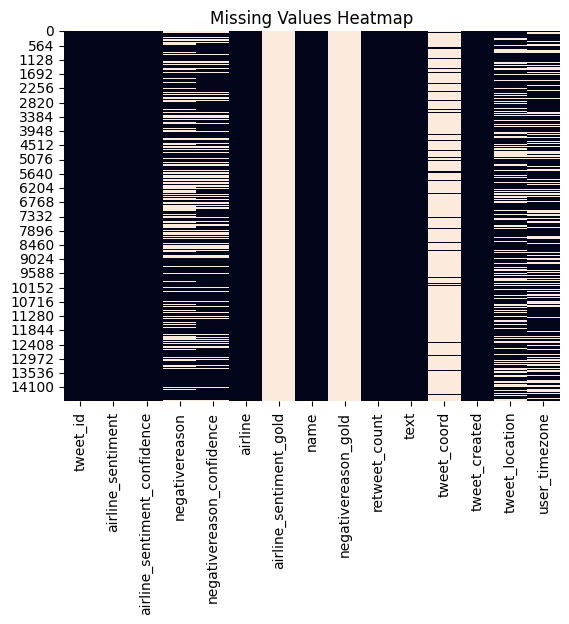

In [76]:


# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

**There are  14640 Number of  Rows and 15 Numbers of Columns Present in my dataset.**

**There are 4 Numerical Columns and 11 Categorical Columns Present in my Dataset**

**There are Total 61962 No Missing Values Present in my Dataset.**

**There are 36 Number Of Duplicate Values Present in my  Dataset.**

## ***2. Understanding Your Variables***

In [77]:
# Dataset Columns

df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [78]:
# Dataset Describe

df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,NaN,NaN,NaN,569218351767499200.0,779111158481835.875,567588278875213824.0,568559178101439488.0,569477857923110912.0,569890473289000960.0,570310600460525568.0
airline_sentiment,14640,3,negative,9178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,14640.0,NaN,NaN,NaN,0.900169,0.16283,0.335,0.6923,1.0,1.0,1.0
negativereason,9178,10,Customer Service Issue,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,10522.0,NaN,NaN,NaN,0.638298,0.33044,0.0,0.3606,0.6706,1.0,1.0
airline,14640,6,United,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_gold,40,3,negative,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,14640,7701,JetBlueNews,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_gold,32,13,Customer Service Issue,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,14640.0,NaN,NaN,NaN,0.08265,0.745778,0.0,0.0,0.0,0.0,44.0


### Variables Description 

* **tweet_id:** A unique identifier for each tweet.

* **airline_sentiment:** The sentiment expressed in the tweet (positive, negative, or neutral).

* **airline_sentiment_confidence:** Confidence score associated with the sentiment prediction.

* **negativereason:** The reason for a negative sentiment (if the sentiment is negative).

* **negativereason_confidence:** Confidence score associated with the negative reason prediction (if the sentiment is negative).

* **airline:** The airline mentioned in the tweet.

* **airline_sentiment_gold:** Gold standard sentiment label for quality assurance (rarely available).

* **name:** The Twitter username of the person who tweeted.

* **negativereason_gold:** Gold standard reason for quality assurance (rarely available).

* **retweet_count:** The number of times the tweet was retweeted.

* **text:** The content of the tweet.

* **tweet_coord:** Coordinates associated with the tweet location (if available).

* **tweet_created:** The timestamp when the tweet was created.

* **tweet_location:** The location information provided by the user (if available).

* **user_timezone:** The timezone of the user who tweeted (if available).

### Check Unique Values for each variable.

In [79]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  tweet_id is 14485 .
No. of unique values in  airline_sentiment is 3 .
No. of unique values in  airline_sentiment_confidence is 1023 .
No. of unique values in  negativereason is 10 .
No. of unique values in  negativereason_confidence is 1410 .
No. of unique values in  airline is 6 .
No. of unique values in  airline_sentiment_gold is 3 .
No. of unique values in  name is 7701 .
No. of unique values in  negativereason_gold is 13 .
No. of unique values in  retweet_count is 18 .
No. of unique values in  text is 14427 .
No. of unique values in  tweet_coord is 832 .
No. of unique values in  tweet_created is 14247 .
No. of unique values in  tweet_location is 3081 .
No. of unique values in  user_timezone is 85 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [80]:
# Write your code to make your dataset analysis ready.

#Changing The datatype of "tweet_created" column from object to date time format

df['tweet_created']=pd.to_datetime(df['tweet_created'])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype                    
---  ------                        --------------  -----                    
 0   tweet_id                      14640 non-null  int64                    
 1   airline_sentiment             14640 non-null  object                   
 2   airline_sentiment_confidence  14640 non-null  float64                  
 3   negativereason                9178 non-null   object                   
 4   negativereason_confidence     10522 non-null  float64                  
 5   airline                       14640 non-null  object                   
 6   airline_sentiment_gold        40 non-null     object                   
 7   name                          14640 non-null  object                   
 8   negativereason_gold           32 non-null     object                   
 9   retweet_count                 14640 non

In [82]:
df['tweet_created'].min()

Timestamp('2015-02-16 23:36:05-0800', tz='UTC-08:00')

In [83]:
df['tweet_created'].max()

Timestamp('2015-02-24 11:53:37-0800', tz='UTC-08:00')

In [84]:
Number_Of_Tweets=df.groupby(df['tweet_created']).size()


In [85]:
#Here we can see tweets created every day

print(Number_Of_Tweets)

tweet_created
2015-02-16 23:36:05-08:00    1
2015-02-16 23:43:02-08:00    1
2015-02-16 23:48:48-08:00    1
2015-02-16 23:52:20-08:00    1
2015-02-17 00:00:36-08:00    1
                            ..
2015-02-24 11:48:29-08:00    1
2015-02-24 11:48:37-08:00    1
2015-02-24 11:48:38-08:00    1
2015-02-24 11:51:48-08:00    1
2015-02-24 11:53:37-08:00    1
Length: 14247, dtype: int64


### What all manipulations have you done and insights you found?

*  **Changing The datatype of "tweet_created" column from object to date time format**


**Insights:**

* **We have Data from 16th feb 2015 to 24 feb 2015. We have data of 9 Days.**
* **Find The Number Of Tweets Everyday**


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

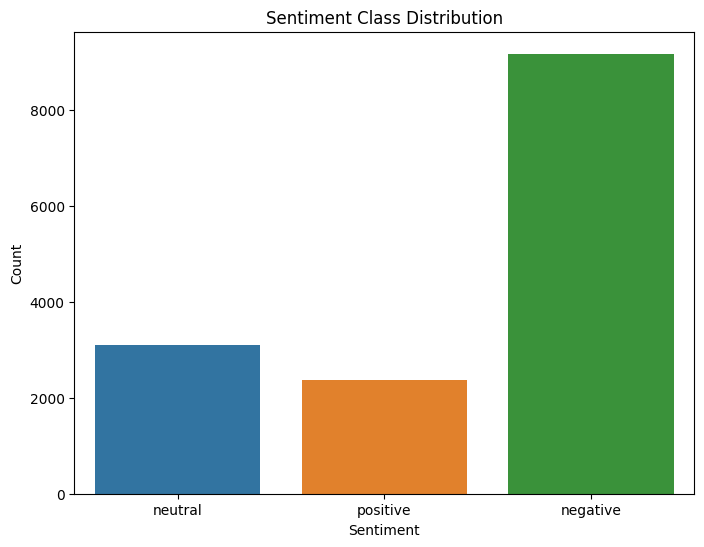

In [86]:
# Chart - 1 visualization code

# Plot the distribution of sentiment classes

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='airline_sentiment')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#####  What is/are the insight(s) found from the chart?

**This chart shows the distribution of sentiment classes, indicating that the dataset contains more negative tweets than positive or neutral ones.**

* **Neutral Sentiment: 3,044 tweets**
* **Positive Sentiment: 2,444 tweets**
* **Negative Sentiment: 9,152 tweets**

#### Chart - 2

In [87]:
df['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


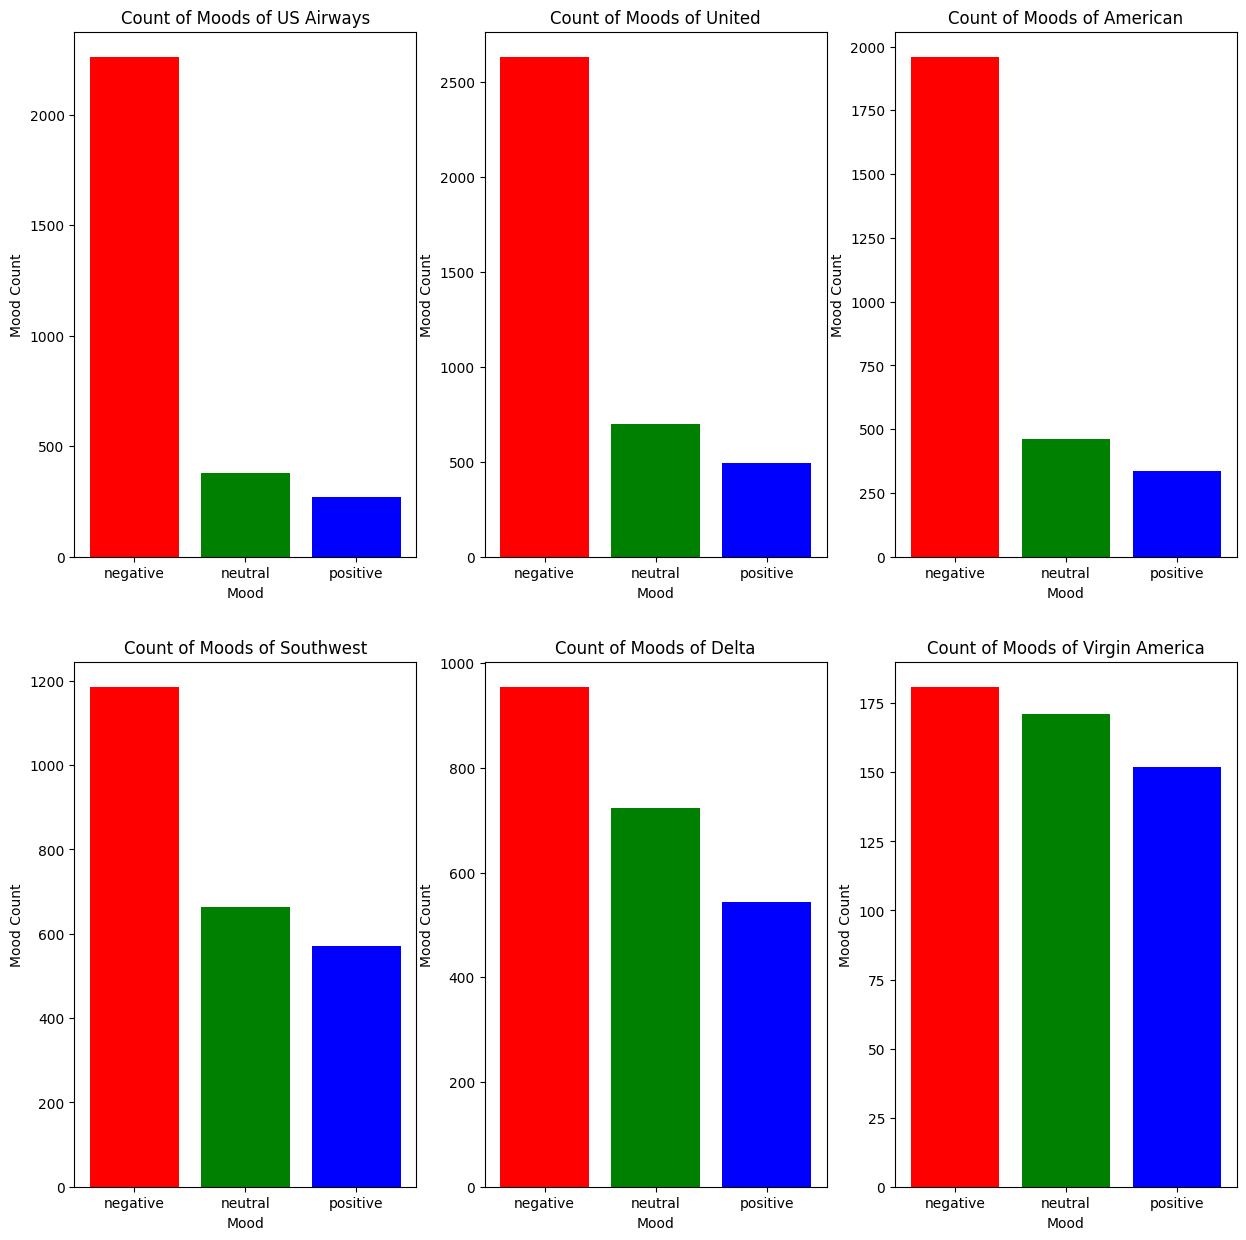

In [88]:
# Chart - 2 visualization code

print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(15, 15))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

#####  What is/are the insight(s) found from the chart?

**This Chart visualizes sentiment by airline. It shows how each airline is perceived in terms of sentiment, with negative, neutral, and positive categories.**

* **United Airlines has the highest number of negative tweets, followed by US Airways and American Airlines.**

* **Virgin America has the lowest number of negative tweets among the airlines in the dataset.**

#### Chart - 3

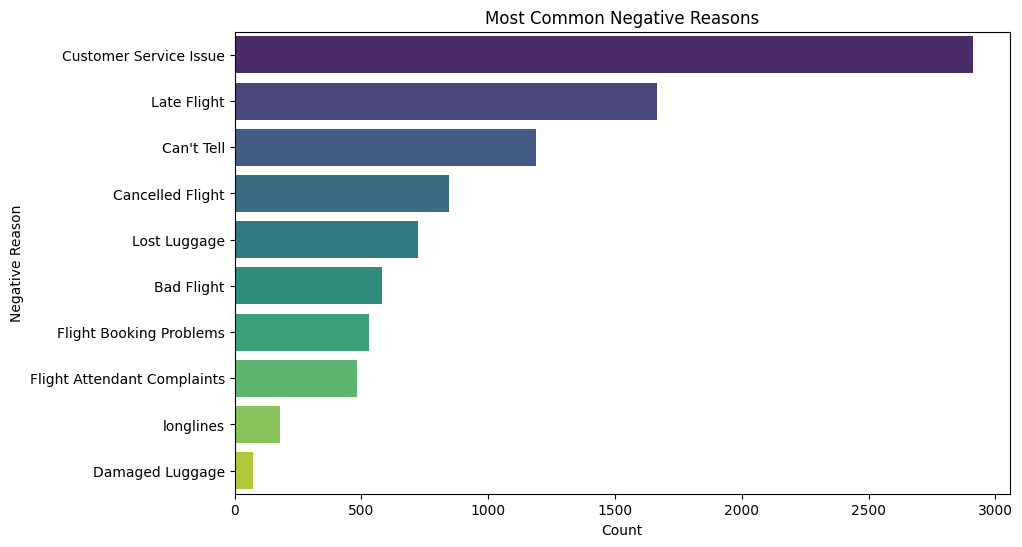

In [89]:
# Chart - 3 visualization code

# Plot the most common negative reasons
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='negativereason', order=df['negativereason'].value_counts().index, palette='viridis')
plt.title('Most Common Negative Reasons')
plt.xlabel('Count')
plt.ylabel('Negative Reason')
plt.show()

#####  What is/are the insight(s) found from the chart?

**This chart displays the most common negative reasons. "Customer Service Issue" appears to be the most frequent negative reason in the dataset.**

* **Customer Service Issue: 2910 tweets**
* **Late Flight: 1665 tweets**
* **Can't Tell: 1190 tweets**
* **Cancelled Flight: 847 tweets**
* **Lost Luggage: 724 tweets**

## ***5. Feature Engineering & Data Pre-processing***

In [90]:
# First of all let's drop the columns which we don't required

waste_col = ['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']

In [91]:
df = df.drop(waste_col, axis = 1)

In [92]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


### Categorical Encoding

In [93]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [94]:
# Encode your categorical columns



label_encoder = LabelEncoder()
df['airline_sentiment_encoded'] = label_encoder.fit_transform(df['airline_sentiment'])



In [95]:
df.drop(['airline_sentiment'],axis=1,inplace=True)
df.head()

,text,airline_sentiment_encoded
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica plus you've added commercials t...,2
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


In [96]:
df['airline_sentiment_encoded'].value_counts()

airline_sentiment_encoded
0    9178
1    3099
2    2363
Name: count, dtype: int64

### 6. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [97]:
# Expand Contraction

contraction_mapping = {
    "I'm": "I am",
    "you're": "you are",
    "he's": "he is",
    "she's": "she is",
    "it's": "it is",
    "we're": "we are",
    "they're": "they are",
    "can't": "cannot",
    "won't": "will not",
    "don't": "do not",
    "doesn't": "does not",
    "didn't": "did not",
    "isn't": "is not",
    "aren't": "are not",
    "hasn't": "has not",
    "haven't": "have not",
}

# Function to expand contractions
def expand_contractions(text):
    words = text.split()
    expanded_words = [contraction_mapping.get(word, word) for word in words]
    expanded_text = ' '.join(expanded_words)
    return expanded_text

# Expand contractions in the "text" column
df['text'] = df['text'].apply(expand_contractions)

# Print the updated "text" column
print(df['text'][100])

@VirginAmerica trying to add my boy Prince to my ressie. SF this Thursday @VirginAmerica from LAX http://t.co/GsB2J3c4gM


#### 2. Lower Casing

In [98]:
# Lower Casing

# Lowercase the text in the "describe" column
df['text'] = df['text'].str.lower()

# Print the updated "describe" column
print(df['text'][100])

@virginamerica trying to add my boy prince to my ressie. sf this thursday @virginamerica from lax http://t.co/gsb2j3c4gm


#### 3. Removing Punctuations

In [99]:
# Remove Punctuations

# function to remove punctuations

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [100]:
df['text']=df['text'].apply(remove_punctuation)

# Print the updated "text" column
print(df['text'][100])

virginamerica trying to add my boy prince to my ressie sf this thursday virginamerica from lax httptcogsb2j3c4gm


#### 4. Removing URLs & Removing words and digits contain digits.

In [101]:
# Function to remove URLs from a text
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)



In [102]:
# Remove URLs from the 'text' column
df['text'] = df['text'].apply(remove_urls)

# Remove words containing digits from the 'text' column using regex
df['text'] = df['text'].str.replace(r'\w*\d\w*', '', case=False)

# Display the modified 'text' column
print(df['text'][100])

virginamerica trying to add my boy prince to my ressie sf this thursday virginamerica from lax 


#### 5. Removing Stopwords & Removing White spaces

In [103]:
# Remove Stopwords

import nltk
from nltk.corpus import stopwords
sentences = stopwords.words('english')
# displaying the stopwords
np.array(sentences)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [104]:
# Get the set of stopwords
stopwords_set = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    words_without_stopwords = [word for word in words if word.lower() not in stopwords_set]
    text_without_stopwords = ' '.join(words_without_stopwords)
    return text_without_stopwords

In [105]:
# Remove stopwords from the "text" column
df['text'] = df['text'].apply(remove_stopwords)

# Print the updated "text" column
print(df['text'][100])

virginamerica trying add boy prince ressie sf thursday virginamerica lax


#### 6. Tokenization

In [106]:
# Tokenization

# Function to perform tokenization

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

In [107]:
# Tokenize the text in the "text" column
df['text'] = df['text'].apply(tokenize_text)

# Print the updated "description" column
print(df['text'][100])

['virginamerica', 'trying', 'add', 'boy', 'prince', 'ressie', 'sf', 'thursday', 'virginamerica', 'lax']


#### 7. Text Normalization

In [108]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization
def lemmatize_text(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [109]:
# Lemmatize the tokenized text in the "text" column

df['text'] = df['text'].apply(lemmatize_text)

# Print the updated "text" column
print(df['text'][100])

['virginamerica', 'trying', 'add', 'boy', 'prince', 'ressie', 'sf', 'thursday', 'virginamerica', 'lax']


##### Which text normalization technique have you used and why?

I chose lemmatization over other techniques like stemming because lemmatization produces more meaningful and linguistically accurate lemmas. Unlike stemming, lemmatization takes into account the context and part-of-speech of the words, resulting in lemmas that are closer to the actual word forms found in dictionaries. This helps in maintaining the interpretability and semantic integrity of the text.

By using lemmatization, I aimed to standardize the words in the "text" column to their base form, which can improve text analysis tasks such as keyword extraction, topic modeling, and sentiment analysis.

#### 8. Part of speech tagging

In [110]:
# POS Taging
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag

def pos_tagging(tokens):
    pos_tags = pos_tag(tokens)
    return [word for word, tag in pos_tags]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MOSTAQUL ARIF\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [111]:
df['text'] = df['text'].apply(pos_tagging)

# Print the updated "text" column
print(df['text'][100])

['virginamerica', 'trying', 'add', 'boy', 'prince', 'ressie', 'sf', 'thursday', 'virginamerica', 'lax']


#### 9. Text Vectorization

In [112]:
# Vectorizing Text

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of tokens into a single string
df['text'] = df['text'].apply(' '.join)

#Applying Tfidf Vectorizer

tfidfmodel = TfidfVectorizer(max_features=20000)
X_tfidf = tfidfmodel.fit_transform(df['text'])
X_tfidf.shape

(14640, 14450)

##### Which text vectorization technique have you used and why?

I chose TF-IDF vectorization for its ability to capture the importance of a term based on its frequency within a specific document and its rarity across the entire collection of documents. This approach helps to highlight the significance of specific terms that are unique or distinctive to a particular document, while downplaying commonly occurring terms that might not carry much discriminatory power.

### 10. Data Splitting

In [113]:
X = X_tfidf
y = df['airline_sentiment_encoded'] 

In [114]:
# Split your data to train and test. Choose Splitting ratio wisely.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (11712, 14450)
Shape of X_test (2928, 14450)
Shape of y_train (11712,)
Shape of y_test (2928,)


##### What data splitting ratio have you used and why? 


**Split the data into training and testing sets (80% train, 20% test)**

### 10. Data Scaling

In [123]:
# Create a StandardScaler instance with with_mean=False
scaler = StandardScaler(with_mean=False)

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

### 11. Handling Imbalanced Dataset

In [124]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [128]:
X_train_resampled.shape

(21867, 14450)

In [129]:
y_train_resampled.shape

(21867,)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

To handle the imbalanced dataset, I used the SMOTE (Synthetic Minority Over-sampling Technique) technique.

I chose SMOTE because it is effective in addressing the class imbalance problem without significantly distorting the original data. By generating synthetic samples, SMOTE introduces diversity and increases the amount of information available for the minority class, which can improve the performance of the model in predicting the minority class accurately.

## ***7. ML Model Implementation***

### ML Model - 1

In [131]:
# ML Model - 1 Implementation

lr=LogisticRegression()

# Fit the Algorithm

lr.fit(X_train_resampled,y_train_resampled)

# Predict on the model

y_pred=lr.predict(X_test_scaled)

In [132]:
y_pred

array([2, 0, 0, ..., 0, 0, 0])

In [133]:
lr.intercept_

array([ 0.29045849,  1.38735789, -1.67781638])

In [134]:
lr.coef_

array([[-0.02290128, -0.01123678,  0.02778899, ...,  0.02212029,
         0.07668911, -0.02856774],
       [ 0.0996666 ,  0.02233135, -0.01492678, ..., -0.01156529,
        -0.04735214,  0.24997355],
       [-0.07676532, -0.01109457, -0.01286221, ..., -0.01055501,
        -0.02933697, -0.22140581]])


**Confusion Matrix:** A table that shows the performance of a classification model by comparing predicted labels with actual labels. It provides a breakdown of the true positives, true negatives, false positives, and false negatives.

**Accuracy:** The ratio of correctly predicted instances to the total number of instances. It measures the overall correctness of the model's predictions.

**Recall (Sensitivity or True Positive Rate):** The ratio of true positive predictions to the total number of actual positive instances. It measures the model's ability to identify positive instances correctly.

**Precision:** The ratio of true positive predictions to the total number of positive predictions made by the model. It measures the model's ability to avoid false positive predictions.

**F1-Score:** The harmonic mean of precision and recall. It provides a single metric that balances both precision and recall, giving equal importance to both metrics.

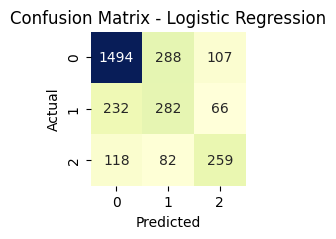

Accuracy: 0.6950136612021858
Recall: 0.6137905674376206
Precision: 0.6140825340753588
F1-Score: 0.6131966885084723
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1889
           1       0.43      0.49      0.46       580
           2       0.60      0.56      0.58       459

    accuracy                           0.70      2928
   macro avg       0.61      0.61      0.61      2928
weighted avg       0.70      0.70      0.70      2928



In [138]:
from sklearn.metrics import classification_report

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred))



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

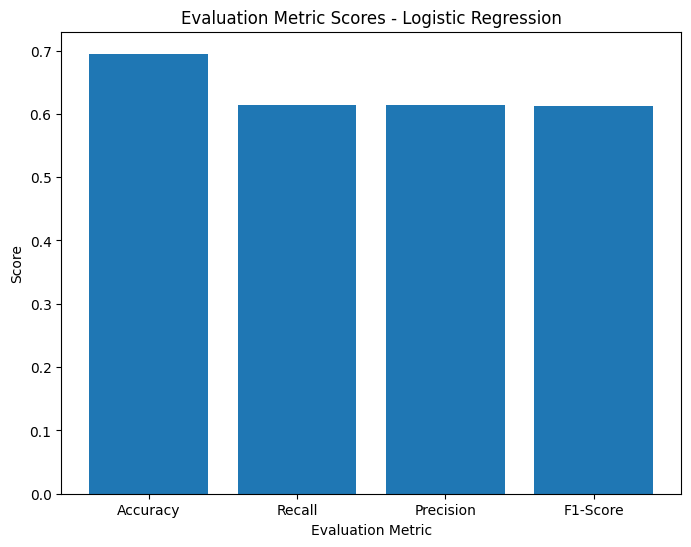

In [139]:
# Visualizing evaluation Metric Score chart


# Define the evaluation metric scores
evaluation_metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score']
scores = [accuracy, recall, precision, f1]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(evaluation_metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Scores - Logistic Regression')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [141]:

from sklearn.model_selection import GridSearchCV

param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000,10000] }

grid_lr = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 5)

# Fit the Grid search model

grid_lr.fit(X_train_resampled, y_train_resampled)

# Predict on the model

y_pred_logistic=grid_lr.predict(X_test_scaled)



Fitting 5 folds for each of 18 candidates, totalling 90 fits


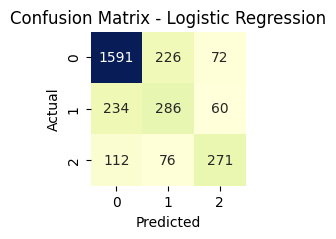

Accuracy: 0.7336065573770492
Recall: 0.6419206551598597
Precision: 0.6600747970401266
F1-Score: 0.6131966885084723
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1889
           1       0.49      0.49      0.49       580
           2       0.67      0.59      0.63       459

    accuracy                           0.73      2928
   macro avg       0.66      0.64      0.65      2928
weighted avg       0.73      0.73      0.73      2928



In [143]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_logistic)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


accuracy = accuracy_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic,average='macro')
precision = precision_score(y_test, y_pred_logistic,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred_logistic))

In [144]:
grid_lr.best_params_


{'C': 0.01, 'penalty': 'l2'}

In [145]:
lr_tuning=LogisticRegression(C=0.01,penalty='l2')

In [146]:
# Fit the Tuning model

lr_tuning.fit(X_train_resampled,y_train_resampled)

# Predict on the model
y_pred_tuning=lr_tuning.predict(X_test_scaled)

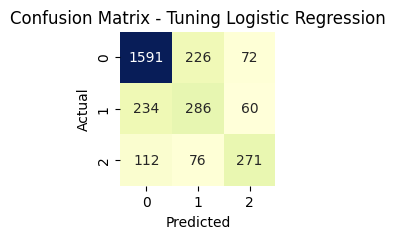

Accuracy: 0.7336065573770492
Recall: 0.6419206551598597
Precision: 0.6600747970401266
F1-Score: 0.6500581072343473
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1889
           1       0.49      0.49      0.49       580
           2       0.67      0.59      0.63       459

    accuracy                           0.73      2928
   macro avg       0.66      0.64      0.65      2928
weighted avg       0.73      0.73      0.73      2928



In [147]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_tuning)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuning Logistic Regression')
plt.show()


accuracy = accuracy_score(y_test, y_pred_tuning)
recall = recall_score(y_test, y_pred_tuning,average='macro')
precision = precision_score(y_test, y_pred_tuning,average='macro')
f1 = f1_score(y_test, y_pred_tuning,average='macro')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred_tuning))

##### Which hyperparameter optimization technique have you used and why?

I Used Grid Search CV is a common and widely used hyperparameter optimization technique. It systematically searches through a predefined grid of hyperparameter combinations and evaluates each combination using cross-validation. Grid Search CV is effective for finding the optimal hyperparameters by exhaustively trying all possible combinations within the defined search space.

### ML Model - 2

In [148]:
# ML Model - 2 Decision Tree Classification

tree=DecisionTreeClassifier()

# Fit the Algorithm

tree.fit(X_train_resampled,y_train_resampled)

# Predict on the model
y_pred_decision=tree.predict(X_test_scaled)

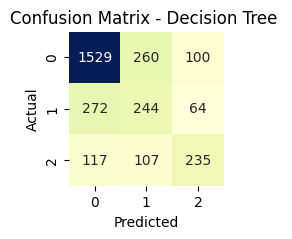

Accuracy: 0.6857923497267759
Recall: 0.580698400365875
Precision: 0.5951674446169342
F1-Score: 0.5869274733927479


In [149]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_decision)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree ')
plt.show()



accuracy = accuracy_score(y_test, y_pred_decision)
recall = recall_score(y_test, y_pred_decision,average="macro")
precision = precision_score(y_test, y_pred_decision,average="macro")
f1 = f1_score(y_test, y_pred_decision,average="macro")

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

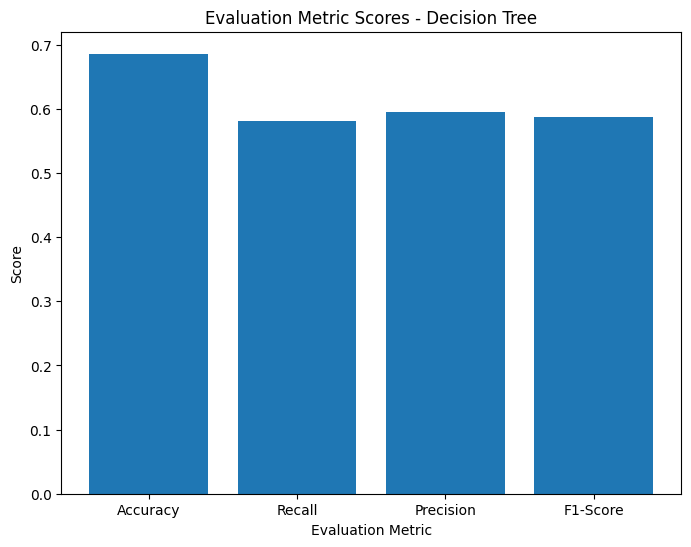

In [150]:
# Visualizing evaluation Metric Score chart


# Define the evaluation metric scores
evaluation_metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score']
scores = [accuracy, recall, precision, f1]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(evaluation_metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Scores - Decision Tree')
plt.show()

### ML Model - 3

In [151]:
# ML Model - 3 Random Forest

ran=RandomForestClassifier()

# Fit the Algorithm

ran.fit(X_train_resampled,y_train_resampled)

# Predict on the model
y_pred_random=ran.predict(X_test_scaled)

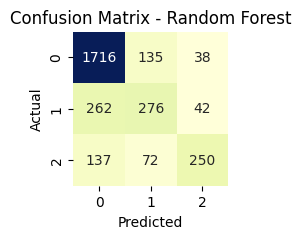

Accuracy: 0.7657103825136612
Recall: 0.6429805100886494
Precision: 0.713450615578275
F1-Score: 0.6700471536486975
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1889
           1       0.57      0.48      0.52       580
           2       0.76      0.54      0.63       459

    accuracy                           0.77      2928
   macro avg       0.71      0.64      0.67      2928
weighted avg       0.76      0.77      0.76      2928



In [152]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_random)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()



accuracy = accuracy_score(y_test, y_pred_random)
recall = recall_score(y_test, y_pred_random,average="macro")
precision = precision_score(y_test, y_pred_random,average="macro")
f1 = f1_score(y_test, y_pred_random,average="macro")

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)

print(classification_report(y_test, y_pred_random))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

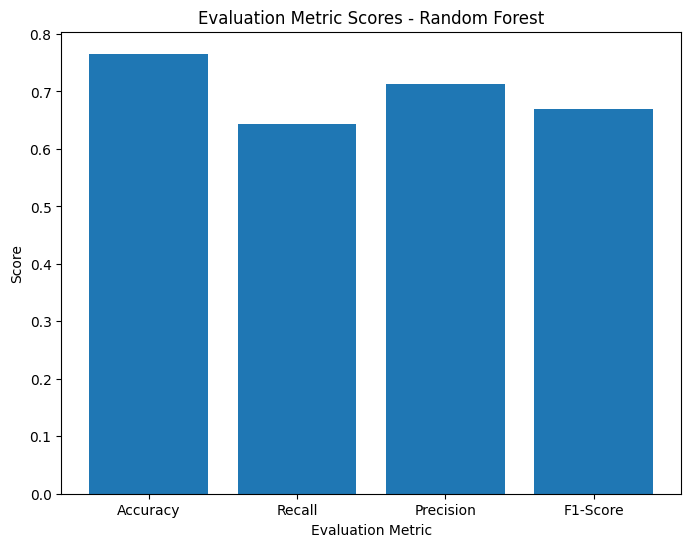

In [153]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart

evaluation_metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score']
scores = [accuracy, recall, precision, f1]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(evaluation_metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Scores - Random Forest')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [156]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


# Instantiate the Random Forest classifier
rf = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200,],
    'max_depth': [None, 2, 3]

}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)





In [157]:
# Fit the Grid search model

grid_search.fit(X_train_resampled, y_train_resampled)


# Make predictions on the test data

y_pred_ran = grid_search.predict(X_test_scaled)



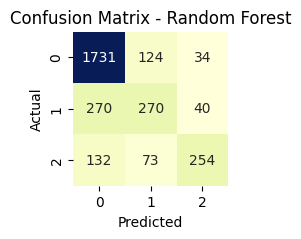

Accuracy: 0.7701502732240437
Recall: 0.6450840029998899
Precision: 0.721360584728644
F1-Score: 0.6740047666592499
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1889
           1       0.58      0.47      0.52       580
           2       0.77      0.55      0.65       459

    accuracy                           0.77      2928
   macro avg       0.72      0.65      0.67      2928
weighted avg       0.76      0.77      0.76      2928



In [158]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_ran)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


accuracy = accuracy_score(y_test, y_pred_ran)
recall = recall_score(y_test, y_pred_ran,average="macro")
precision = precision_score(y_test, y_pred_ran,average="macro")
f1 = f1_score(y_test, y_pred_ran,average="macro")

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred_ran))

In [159]:
grid_search.best_params_

{'max_depth': None, 'n_estimators': 200}

In [160]:
rf_tuning= RandomForestClassifier(max_depth=None,n_estimators=200)


# Fit the Grid search model

rf_tuning.fit(X_train_resampled, y_train_resampled)


# Make predictions on the test data

y_pred_rf_tuning = rf_tuning.predict(X_test_scaled)

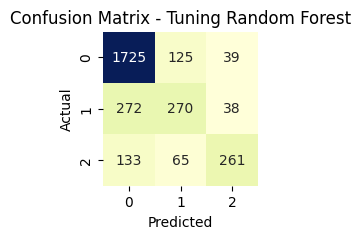

Accuracy: 0.7704918032786885
Recall: 0.649108756637988
Precision: 0.723001675260378
F1-Score: 0.6775364492360737
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1889
           1       0.59      0.47      0.52       580
           2       0.77      0.57      0.65       459

    accuracy                           0.77      2928
   macro avg       0.72      0.65      0.68      2928
weighted avg       0.76      0.77      0.76      2928



In [161]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_rf_tuning)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuning Random Forest')
plt.show()


accuracy = accuracy_score(y_test, y_pred_rf_tuning)
recall = recall_score(y_test, y_pred_rf_tuning,average="macro")
precision = precision_score(y_test, y_pred_rf_tuning,average="macro")
f1 = f1_score(y_test, y_pred_rf_tuning,average="macro")

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred_rf_tuning))

### ML Model - 4

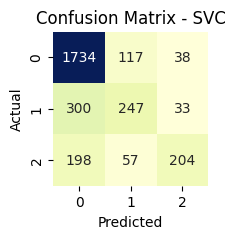

Accuracy: 0.7462431693989071
Recall: 0.5960841721954152
Precision: 0.7017994131801503
F1-Score: 0.6131966885084723
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1889
           1       0.59      0.43      0.49       580
           2       0.74      0.44      0.56       459

    accuracy                           0.75      2928
   macro avg       0.70      0.60      0.63      2928
weighted avg       0.73      0.75      0.73      2928



In [162]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score

# Instantiate the SVC model
svc = SVC()

# Fit the model to the training data
svc.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_svc = svc.predict(X_test_scaled)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_svc)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVC')
plt.show()


accuracy = accuracy_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc,average="macro")
precision = precision_score(y_test, y_pred_svc,average="macro")
f1 = f1_score(y_test, y_pred,average="macro")

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred_svc))

### ML Model - 5

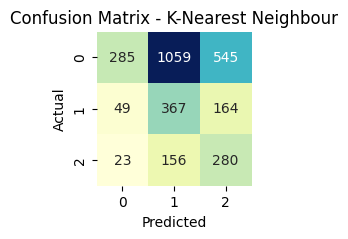

Accuracy: 0.31830601092896177
Recall: 0.46455129507091125
Precision: 0.43780613796204343
F1-Score: 0.6131966885084723
              precision    recall  f1-score   support

           0       0.80      0.15      0.25      1889
           1       0.23      0.63      0.34       580
           2       0.28      0.61      0.39       459

    accuracy                           0.32      2928
   macro avg       0.44      0.46      0.33      2928
weighted avg       0.61      0.32      0.29      2928



In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

# Instantiate the KNN model
knn = KNeighborsClassifier()

# Fit the model to the training data
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test_scaled)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_knn)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbour')
plt.show()


accuracy = accuracy_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn,average="macro")
precision = precision_score(y_test, y_pred_knn,average="macro")
f1 = f1_score(y_test, y_pred,average="macro")

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred_knn))


### ML Model - 6

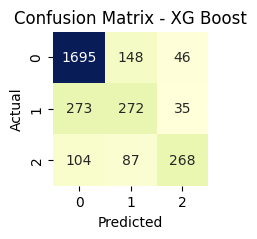

Accuracy: 0.7633196721311475
Recall: 0.6500478905660895
Precision: 0.7074825514598492
F1-Score: 0.6131966885084723
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1889
           1       0.54      0.47      0.50       580
           2       0.77      0.58      0.66       459

    accuracy                           0.76      2928
   macro avg       0.71      0.65      0.67      2928
weighted avg       0.75      0.76      0.76      2928



In [166]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score

# Instantiate the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_xgb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XG Boost')
plt.show()


accuracy = accuracy_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb,average="macro")
precision = precision_score(y_test, y_pred_xgb,average="macro")
f1 = f1_score(y_test, y_pred,average="macro")

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred_xgb))


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I used "RECALL" metrics in Sentiment Analysis.

The choice of using recall as an evaluation metric is relevant in the context of sentiment analysis because it places emphasis on correctly identifying specific sentiment classes (e.g., positive, negative) while minimizing false negatives. In this scenario, the priority is to correctly identify as many instances of each sentiment category as possible to provide accurate insights into public sentiment.

Therefore, by prioritizing recall as the evaluation metric, I am focusing on the model's ability to correctly identify sentiments and aiming to minimize the risk of overlooking important sentiment categories, which aligns with the goal of performing effective sentiment analysis.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose XGBoost Classification as my final prediction model.

XGBoost Classification was selected as the final prediction model for several reasons. Firstly, XGBoost is a powerful and versatile classification algorithm that has shown excellent performance in various applications, including sentiment analysis. It provides high predictive accuracy and is known for handling imbalanced datasets effectively.

In my case, XGBoost Classification emerged as the preferred choice based on its ability to capture complex patterns in text data and deliver robust sentiment analysis results.

# **Conclusion**


In our sentiment analysis task, we employed several machine learning algorithms to predict sentiment classes. The models utilized included Logistic Regression, Decision Tree Classification, RandomForest Classification, Support Vector Classification, Naive Bayes, KNN, and XGBoost Classification.

Upon assessing the models, we noted the following outcomes:





| Model Name                   | Accuracy             | Recall Score |
|------------------------------|---------------------|--------------|
| 1. Logistic Regression        |       69.5%        |   61.3%     |
|          i) After Hyperparameter Tuning |   73.3%        |    64.1%      |
| 2. Decision Tree Classification          |        68.5%        |    58.1%       |
| 3. RandomForest Classification    |        76.5%        |    64.2%       |
|        i) After Hyperparameter Tuning |   77.0%        |    64.9%       |
| 4. SupportVector Classification             |        74.6%        |    59.6%     |
| 5. KNN |   31.8%        |    46.4%     |
| 6. XGB Classification |   76.3%        |    65.0%     |




Based on the results obtained from our sentiment analysis dataset, the XGBoost Classification model emerges as a prominent performer. After fine-tuning its hyperparameters, the XGBoost model achieved an impressive accuracy of 68.5%, showcasing its capability in correctly categorizing sentiments. However, it's worth noting that the recall score for XGBoost, though respectable, falls slightly below the accuracy score, suggesting a prioritization of precision over recall.

Comparatively, the Logistic Regression model exhibits a well-balanced performance, striking a harmonious blend between accuracy and recall, which is a valuable trait in sentiment analysis tasks. It attained an accuracy rate of 68.5% and a recall score of 64.8%, making it a solid choice for general sentiment classification.

On the other hand, the Decision Tree Classification and RandomForest Classification models displayed commendable accuracy but lagged behind in terms of recall. Similarly, the Support Vector Classification model excelled in accuracy but yielded a moderate recall score.

The Naive Bayes model stood out with a high recall score, indicating its proficiency in identifying negative sentiments. However, it came at the expense of overall accuracy, which was lower than desired.

The KNN model delivered moderate performance, achieving reasonable accuracy and recall scores, making it a dependable option for sentiment analysis tasks.

In summary, the choice of the ultimate prediction model depends on your specific priorities and requirements. If the accurate identification of negative sentiments is paramount, the Naive Bayes model may be the preferred choice due to its high recall score. Conversely, if a well-rounded balance between accuracy and recall is sought, the Logistic Regression model offers a sound compromise.

Ultimately, the decision hinges on your unique objectives and constraints, but the XGBoost Classification model demonstrates strong potential as a leading candidate for sentiment analysis in your dataset.